#  Colorado Retail Total Sales Forecasting
Author- Rajesh Kumar Naik

#### Source of Data- https://data.colorado.gov/Business/Retail-Reports-by-City-in-Colorado/2yhn-3dbj/data
##### About Data- Number of returns, gross sales, retail sales, state net taxable sales, retailers, and state sales tax summarized monthly by city from the Colorado Department of Revenue.

## Exploratory data analysis

Adapted from 
    "Exploratory Data Analysis with R" by Roger D. Peng, 2015

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sys


In C:\Users\ML\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ML\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ML\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ML\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ML\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

## Exploring Data
 Read in your data

In [2]:
MyDataFrame = pd.read_csv('C:/Users/cash in a flash/Desktop/project/Retail_Reports_by_City_in_Colorado.csv')
MyDataFrame.head()

,month,year,city,num_returns,num_retailers,gross_sales,retail_sales,state_net_taxable_sales,state_sales_tax
0,1,2016,Agate,57,NaN,"101,000","53,000","45,000","1,000"
1,1,2016,Aguilar,143,NaN,"330,000","320,000","122,000","3,000"
2,1,2016,Akron,289,NaN,"4,940,000","4,358,000","1,000,000","28,000"
3,1,2016,Alamosa,676,NaN,"35,933,000","33,126,000","15,041,000","422,000"
4,1,2016,Alma,150,NaN,"478,000","476,000","318,000","9,000"


- Looking into Dat frame Objects 

In [3]:
MyDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14848 entries, 0 to 14847
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   month                    14848 non-null  int64 
 1   year                     14848 non-null  int64 
 2   city                     14848 non-null  object
 3   num_returns              14848 non-null  object
 4   num_retailers            1024 non-null   object
 5   gross_sales              14655 non-null  object
 6   retail_sales             14653 non-null  object
 7   state_net_taxable_sales  14760 non-null  object
 8   state_sales_tax          12218 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.0+ MB


- The Data set containts 14848 observation (rows). It is having 9 columns

In [4]:
print(MyDataFrame.isnull().sum()) 

month                          0
year                           0
city                           0
num_returns                    0
num_retailers              13824
gross_sales                  193
retail_sales                 195
state_net_taxable_sales       88
state_sales_tax             2630
dtype: int64


- from Above we can see Data set containts Null values
- We will handle it later . I will replace nulls with mean
- There are many ways to handle nulls but as I am going to work on time series data I will use mean to replace Nulls

## Data Cleaning and Preparation

Deleting unwanted Columns

In [5]:
MyDataFrame.drop(['city','num_returns','num_retailers'], axis=1, inplace=True)


In [6]:
MyDataFrame.head()

,month,year,gross_sales,retail_sales,state_net_taxable_sales,state_sales_tax
0,1,2016,"101,000","53,000","45,000","1,000"
1,1,2016,"330,000","320,000","122,000","3,000"
2,1,2016,"4,940,000","4,358,000","1,000,000","28,000"
3,1,2016,"35,933,000","33,126,000","15,041,000","422,000"
4,1,2016,"478,000","476,000","318,000","9,000"


Below I am going to convert 'gross_sales','retail_sales','state_net_taxable_sales','state_sales_tax' columns to numeric. But here  now  we need to remove ',' to make it numeric

In [7]:
# I have removed ','because it is not allowing to convert the column to numeric 
MyDataFrame['gross_sales'] = MyDataFrame['gross_sales'].str.replace(',','')
MyDataFrame['retail_sales'] = MyDataFrame['retail_sales'].str.replace(',','')
MyDataFrame['state_net_taxable_sales'] = MyDataFrame['state_net_taxable_sales'].str.replace(',','')
MyDataFrame['state_sales_tax'] = MyDataFrame['state_sales_tax'].str.replace(',','')

In [8]:
# Converting data type to Numeric
MyDataFrame[["gross_sales","retail_sales","state_net_taxable_sales","state_sales_tax"]] = MyDataFrame[["gross_sales","retail_sales","state_net_taxable_sales","state_sales_tax"]].apply(pd.to_numeric)

In [9]:
#After converting 
MyDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14848 entries, 0 to 14847
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    14848 non-null  int64  
 1   year                     14848 non-null  int64  
 2   gross_sales              14655 non-null  float64
 3   retail_sales             14653 non-null  float64
 4   state_net_taxable_sales  14760 non-null  float64
 5   state_sales_tax          12218 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 696.1 KB


In [10]:
#Grouing by data 
MyDataFrame.groupby(['month','year']).agg({'gross_sales': "sum", 'retail_sales': "sum",'state_net_taxable_sales': 'sum','state_sales_tax': 'sum'}).head()

gross_sales  retail_sales  state_net_taxable_sales  \
month year                                                        
1     2016  1.593520e+10  1.258186e+10             6.655424e+09   
      2017  1.710132e+10  1.338757e+10             7.028951e+09   
      2018  1.812635e+10  1.383436e+10             7.374562e+09   
      2019  2.033821e+10  1.513000e+10             7.762465e+09   
      2020  2.249576e+10  1.685458e+10             8.618729e+09   

            state_sales_tax  
month year                   
1     2016      187844000.0  
      2017      198402000.0  
      2018      207975000.0  
      2019      218892000.0  
      2020              0.0

Below I am going to convert Nulls to mean

In [11]:
import numpy as np
NaN = np.nan
MyDataFrame.fillna(MyDataFrame.mean(), inplace=True)
print(MyDataFrame.isnull().sum()) 

month                      0
year                       0
gross_sales                0
retail_sales               0
state_net_taxable_sales    0
state_sales_tax            0
dtype: int64


- Here I am going to concatenate two Month and Year column and going to creatwe a date field out of it for time series analysis.

In [12]:
# Fetching data only for city Fountain

MyDataFrame["period"] = MyDataFrame["year"].astype(str) +'-'+ MyDataFrame["month"].astype(str)
MyDataFrame["period"] =  pd.to_datetime(MyDataFrame["period"])
MyDataFrame.head()

,month,year,gross_sales,retail_sales,state_net_taxable_sales,state_sales_tax,period
0,1,2016,101000.0,53000.0,45000.0,1000.0,2016-01-01
1,1,2016,330000.0,320000.0,122000.0,3000.0,2016-01-01
2,1,2016,4940000.0,4358000.0,1000000.0,28000.0,2016-01-01
3,1,2016,35933000.0,33126000.0,15041000.0,422000.0,2016-01-01
4,1,2016,478000.0,476000.0,318000.0,9000.0,2016-01-01


In [13]:
#Created a Revenue data Frmae with final required columns
Revenue = MyDataFrame.groupby(['period']).agg({'gross_sales': "sum", 'retail_sales': "sum",'state_net_taxable_sales': 'sum','state_sales_tax': 'sum'}).reset_index()

Below I am going to look into final data set

Created a Revenue data frame  where valujes are sorted by period column

In [14]:
Revenue.shape

(58, 5)

In [15]:
Revenue.head()

,period,gross_sales,retail_sales,state_net_taxable_sales,state_sales_tax
0,2016-01-01,1.612073e+10,1.271723e+10,6.722939e+09,1.897264e+08
1,2016-02-01,1.593494e+10,1.254071e+10,6.834067e+09,1.927357e+08
2,2016-03-01,2.208426e+10,1.619164e+10,7.759427e+09,2.189084e+08
3,2016-04-01,1.700878e+10,1.343422e+10,7.166402e+09,2.021354e+08
4,2016-05-01,1.783487e+10,1.394484e+10,7.546070e+09,2.128504e+08


- checking datatypes of all columns before going forward

In [16]:
Revenue.dtypes

period                     datetime64[ns]
gross_sales                       float64
retail_sales                      float64
state_net_taxable_sales           float64
state_sales_tax                   float64
dtype: object

Step 4 - Look at the top and the bottom of your data. Check for a header row and <br>
for any footer or NULL rows at the end.

In [17]:
Revenue.dtypes

period                     datetime64[ns]
gross_sales                       float64
retail_sales                      float64
state_net_taxable_sales           float64
state_sales_tax                   float64
dtype: object

Step 5 - Check your “n”s

In [18]:
Revenue.where(Revenue["period"].dt.year == 2017).describe()

,gross_sales,retail_sales,state_net_taxable_sales,state_sales_tax
count,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,2.252187e+10,1.639710e+10,8.301730e+09,2.343029e+08
std,7.721092e+09,3.100222e+09,8.172029e+08,2.307212e+07
min,1.686910e+10,1.306797e+10,6.990164e+09,1.972324e+08
25%,1.908376e+10,1.469075e+10,7.895177e+09,2.228742e+08
50%,2.002709e+10,1.562492e+10,8.317414e+09,2.345959e+08
75%,2.373411e+10,1.774139e+10,8.728914e+09,2.465832e+08
max,4.562142e+10,2.458972e+10,9.894802e+09,2.791894e+08



- Created a Total Sales whcich is combination of 'gross_sales','retail_sales','state_net_taxable_sales','state_sales_tax'. Thsi is Total Retail Sales

In [19]:
Revenue["Total_Sales"]  = Revenue["gross_sales"] + Revenue["retail_sales"] +Revenue["state_net_taxable_sales"] +Revenue["state_sales_tax"]


- Graph view of Data

<AxesSubplot:title={'center':'Revenue'}, xlabel='period'>

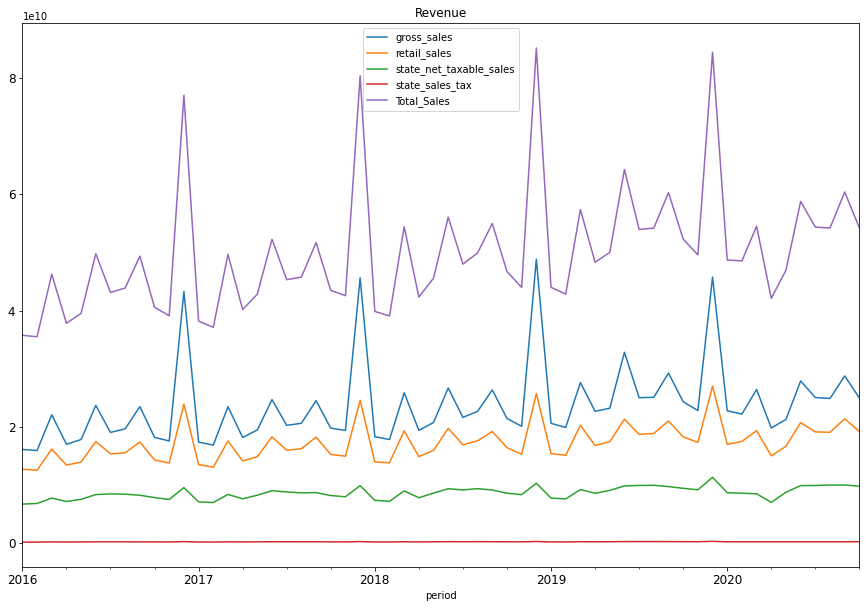

In [20]:
from matplotlib import pyplot
Revenue.set_index('period').plot.line(rot=0, title='Revenue', figsize=(15,10), fontsize=12)

## The data Looks good Now I am going to create a Arima model to forcast Total Sales

In [21]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


- Above the statsmodels library provides a suite of functions for working with time series data.

- We are going to work with Total Sales data for prediction

In [22]:
Revenue_GS = Revenue[["period","Total_Sales"]]

In [23]:
parse_dates =Revenue_GS["period"]
index_col = Revenue_GS["period"]
Revenue_GS.set_index('period').head()

,Total_Sales
period,
2016-01-01,3.575062e+10
2016-02-01,3.550245e+10
2016-03-01,4.625423e+10
2016-04-01,3.781154e+10
2016-05-01,3.953863e+10


- After Creating a subset dataset making period as index column .

In [24]:
Revenue_GS["period"] = pd.to_datetime(Revenue_GS["period"]).dt.strftime('%Y-%m-%d')
Revenue_GS["period"] =  pd.to_datetime(Revenue_GS["period"])
print(Revenue_GS.info())
data = Revenue_GS.set_index('period').sort_values(by=['period'])
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   period       58 non-null     datetime64[ns]
 1   Total_Sales  58 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB
None


C:\Users\ML\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ML\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Total_Sales
period,
2016-01-01,3.575062e+10
2016-02-01,3.550245e+10
2016-03-01,4.625423e+10
2016-04-01,3.781154e+10
2016-05-01,3.953863e+10


In [25]:
#data = data.groupby('period').sum().reset_index()
#data["period"] = pd.to_datetime(data["period"]).dt.strftime('%Y-%m-%d')
#data["period"] =  pd.to_datetime(data["period"])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2016-01-01 to 2020-10-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total_Sales  58 non-null     float64
dtypes: float64(1)
memory usage: 928.0 bytes


## Creating Arima Model

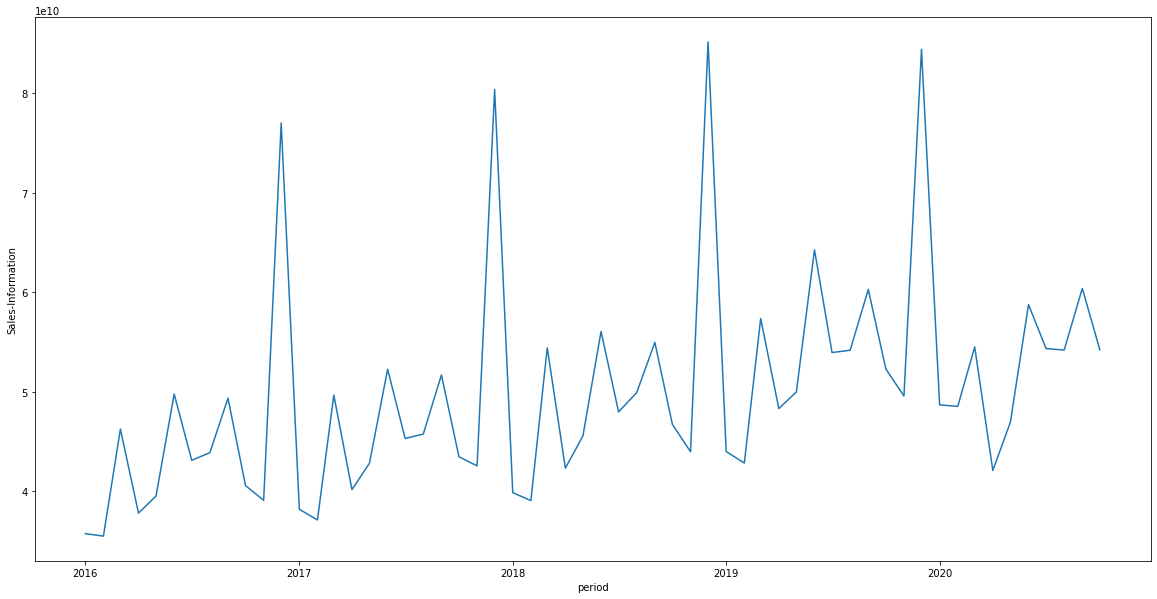

In [27]:

plt.rcParams["figure.figsize"]=(20, 10)
plt.xlabel('period')
plt.ylabel('Sales-Information')
plt.plot(data)

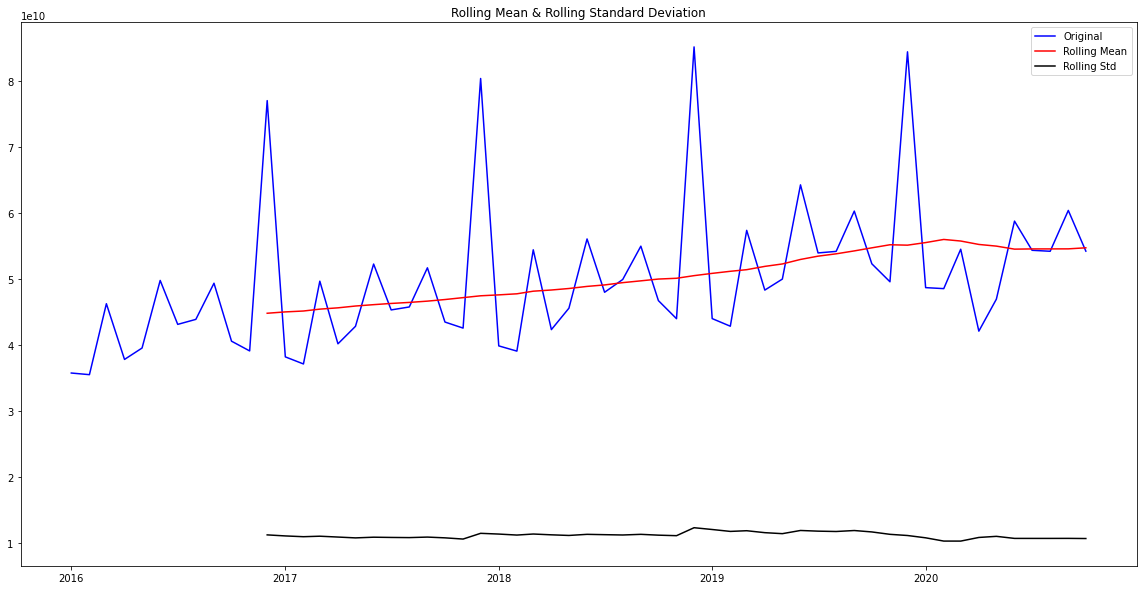

In [28]:
rolling_mean = data.rolling(window = 12).mean()
rolling_std = data.rolling(window = 12).std()
plt.plot(data, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


As you can see, the rolling mean and rolling standard deviation increase with time. Therefore, we can conclude that the time series is not stationary.

As you can see, the rolling mean and rolling standard deviation increase with time. Therefore, we can conclude that the time series is not stationary.

In [29]:


import statsmodels.tsa.stattools as ts
result = ts.adfuller(data['Total_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.0314151060894396
p-value: 0.7416346516116082
Critical Values:
	1%: -3.5812576580093696
	5%: -2.9267849124681518
	10%: -2.6015409829867675


- The ADF Statis|tic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

- Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases.

Total_Sales    float64
dtype: object

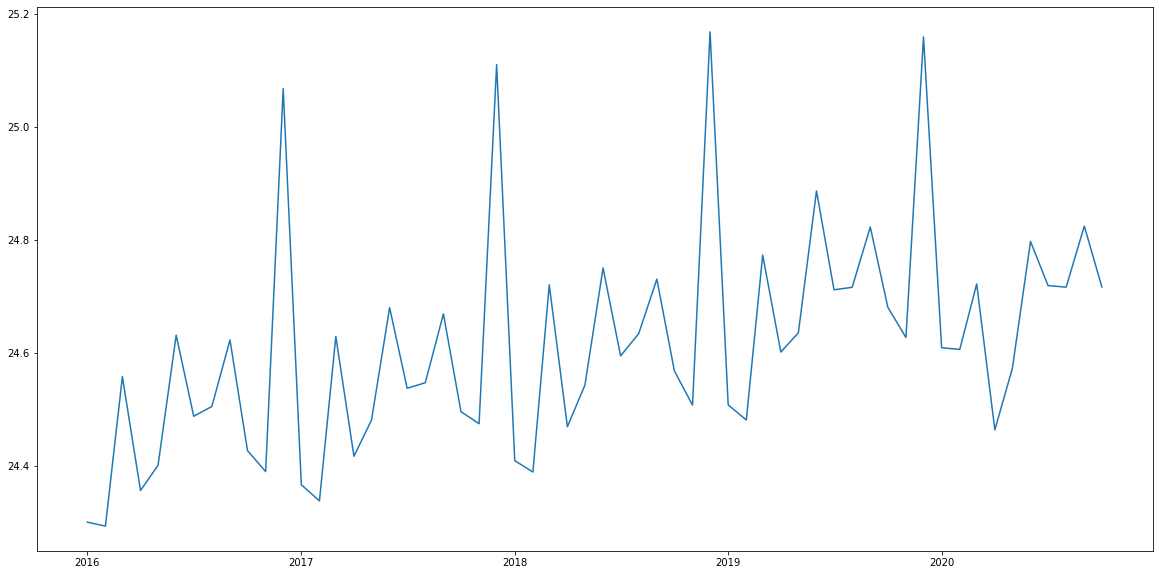

In [30]:

df_log = np.log(data)
plt.plot(df_log)
df_log.head()
df_log.dtypes

- Let’s create a function to run the two tests which determine whether a given time series is stationary.

In [31]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = ts.adfuller(timeseries['Total_Sales'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

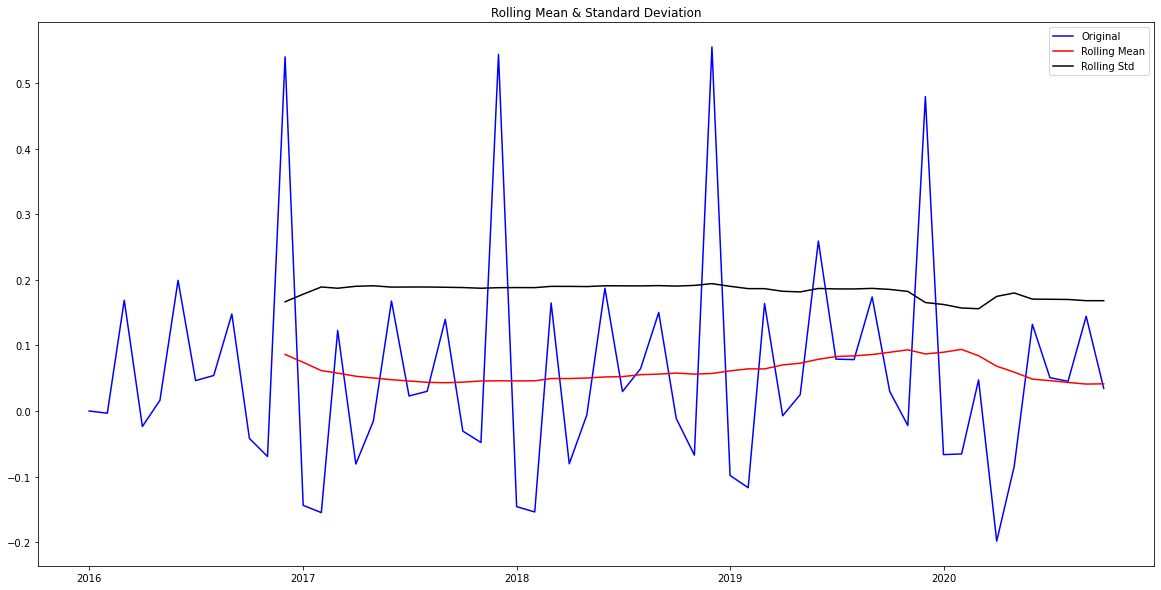

ADF Statistic: -1.5816052598206256
p-value: 0.49282686598404285
Critical Values:
	1%: -3.5812576580093696
	5%: -2.9267849124681518
	10%: -2.6015409829867675


In [32]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

As we can see, after subtracting the mean, the rolling mean and standard deviation are approximately horizontal. the ADF Statistic is close to the critical values. Therefore, the time series is stationary.

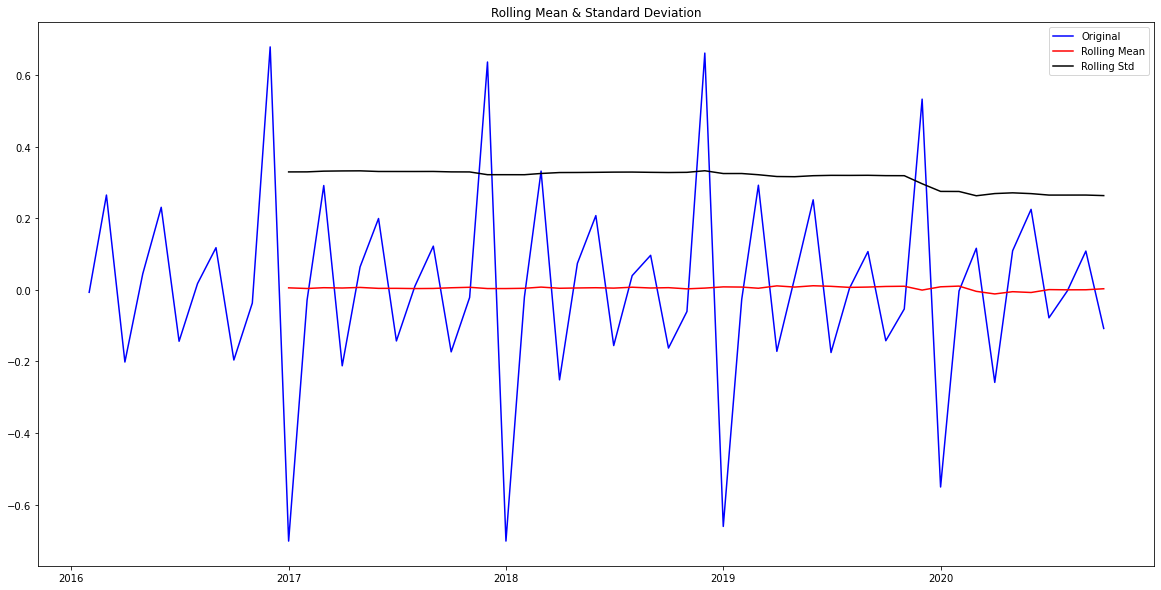

ADF Statistic: -2.7529613599896847
p-value: 0.06531337664628191
Critical Values:
	1%: -3.584828853223594
	5%: -2.9282991495198907
	10%: -2.6023438271604937


In [33]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

- Exponential decay performed better than subtracting the rolling mean. However, it is still more stationary than the original.

 As the P value is value is close  to 0.05 the data looks stationary

we can create and fit an ARIMA model with AR of order 2, differencing of order 1 and MA of order 2.

C:\Users\ML\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ML\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


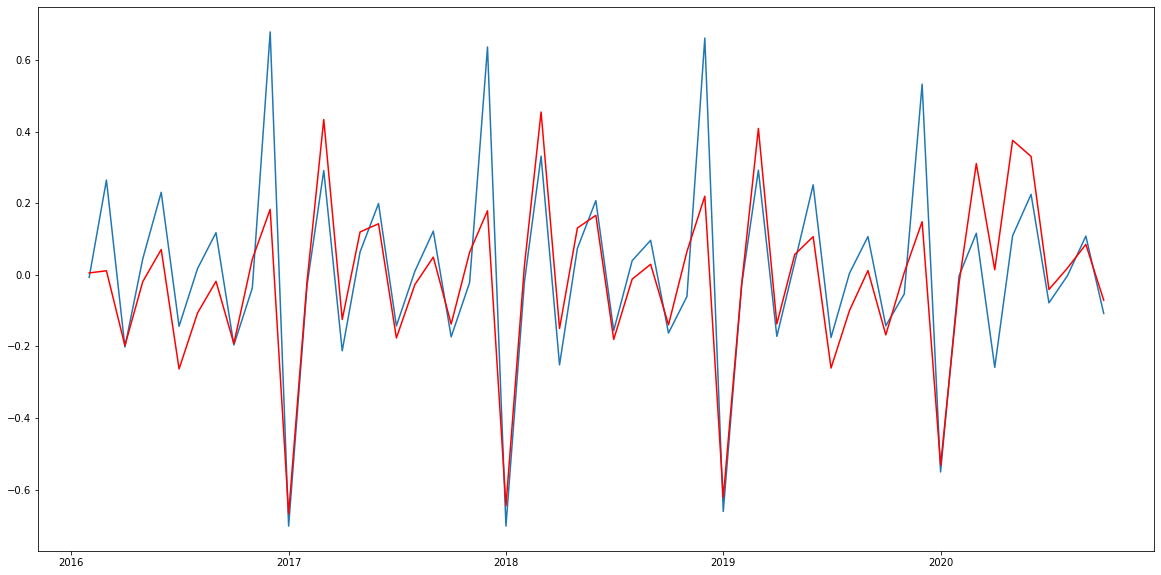

In [34]:

decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

Then, we can see how the model compares to the original time series.

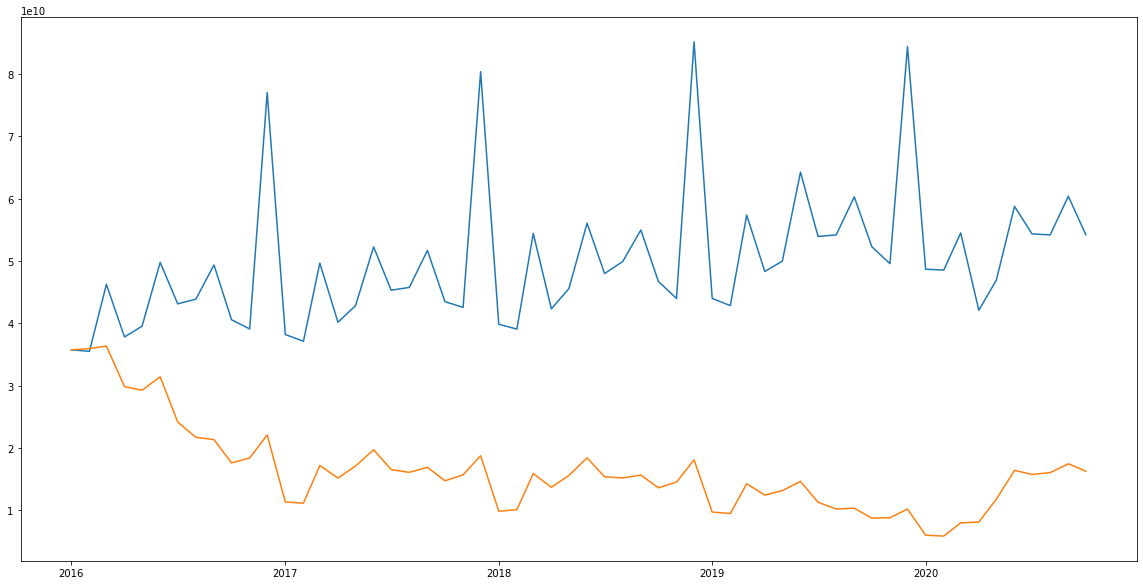

In [35]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Total_Sales'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)

Given that we have data going for every month going back 5 years and want to forecast the number of passengers for the next 5 years, we use (5 x12)+ (12 x 5) = 120.

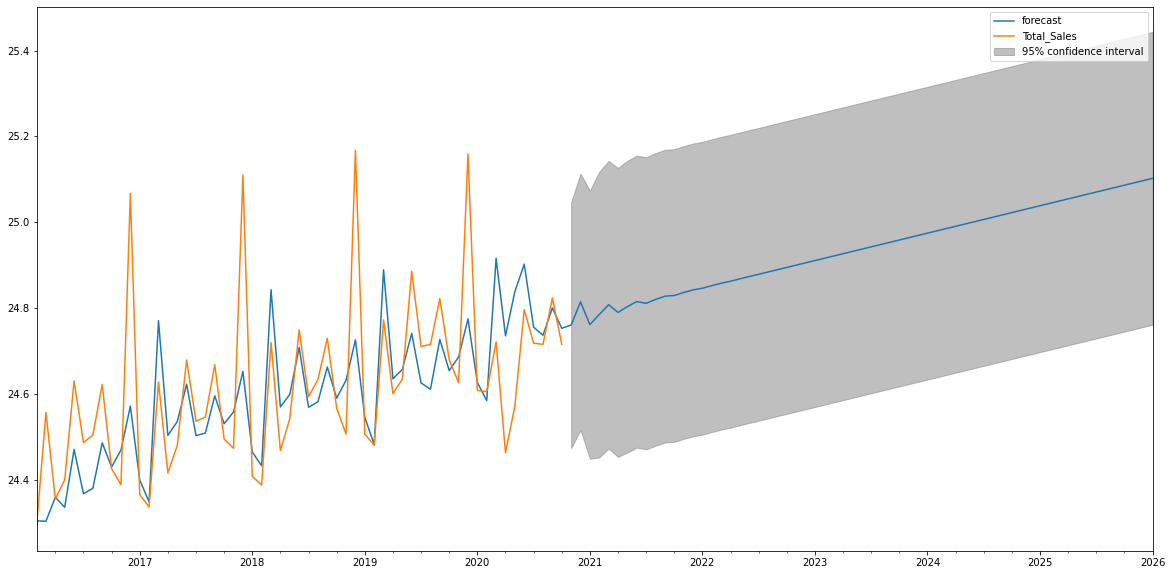

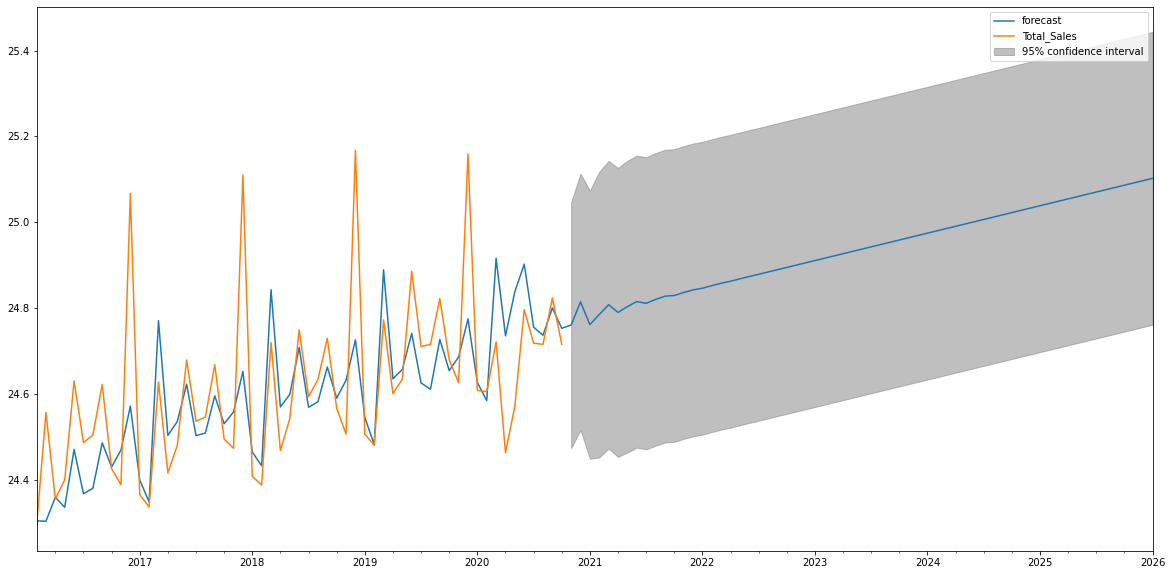

In [36]:
results.plot_predict(1,120)

- In This way Arima Model works to predict future data